<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [3]:
df=pd.read_csv(r'C:\Users\pc\Downloads\Telegram Desktop\Mini Project 2 - Regression (Bike Sharing Demand)\Mini Project 2 - Regression (Bike Sharing Demand)\train.csv')

## EDA

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
df.shape

(10886, 12)

In [8]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3115,2011-07-18 17:00:00,3,0,1,1,34.44,39.395,49,22.0028,72,473,545
9246,2012-09-08 15:00:00,3,0,0,3,22.96,26.515,88,16.9979,175,337,512
439,2011-02-01 09:00:00,1,0,1,2,6.56,11.365,93,0.0000,2,114,116
10127,2012-11-07 08:00:00,4,0,1,2,10.66,12.120,60,19.0012,18,583,601
7600,2012-05-16 01:00:00,2,0,1,2,23.78,27.275,88,8.9981,7,14,21


In [13]:
df[['season','temp','humidity','windspeed','count']][200:220]

,season,temp,humidity,windspeed,count
200,1,9.02,35,23.9994,82
201,1,8.20,34,30.0026,92
202,1,7.38,37,26.0027,62
203,1,6.56,40,22.0028,48
204,1,6.56,43,22.0028,41
205,1,5.74,46,16.9979,38
206,1,5.74,46,27.9993,20
207,1,5.74,46,19.9995,15
208,1,4.92,50,12.9980,6
209,1,4.92,50,19.0012,5


In [14]:
df.iloc[160]

datetime      2011-01-07 23:00:00
season                          1
holiday                         0
workingday                      1
weather                         2
temp                         7.38
atemp                        9.85
humidity                       51
windspeed                 11.0014
casual                          1
registered                     14
count                          15
Name: 160, dtype: object

In [15]:
df.iloc[[500,1000,1500,2000]]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
500,2011-02-03 23:00:00,1,0,1,1,8.20,11.365,47,7.0015,4,34,38
1000,2011-03-06 03:00:00,1,0,0,2,17.22,21.210,82,19.9995,2,9,11
1500,2011-04-08 09:00:00,2,0,1,2,14.76,17.425,76,12.9980,17,168,185
2000,2011-05-10 06:00:00,2,0,1,1,17.22,21.210,67,8.9981,9,103,112


In [16]:
df.iloc[[20,21,22],[1,4,5,-1]]

,season,weather,temp,count
20,1,2,16.4,36
21,1,2,16.4,34
22,1,2,16.4,28


In [17]:
df.loc[:,['season','temp','count']]

,season,temp,count
0,1,9.84,16
1,1,9.02,40
2,1,9.02,32
3,1,9.84,13
4,1,9.84,1
...,...,...,...
10881,4,15.58,336
10882,4,14.76,241
10883,4,13.94,168
10884,4,13.94,129


In [18]:
df.query('season == 4 and weather == 3 and temp <= 20.0')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4062,2011-10-01 07:00:00,4,0,0,3,17.22,21.210,67,16.9979,6,30,36
4064,2011-10-01 09:00:00,4,0,0,3,16.40,20.455,82,23.9994,17,112,129
4065,2011-10-01 10:00:00,4,0,0,3,16.40,20.455,76,23.9994,21,100,121
4066,2011-10-01 11:00:00,4,0,0,3,15.58,19.695,82,22.0028,30,102,132
4072,2011-10-01 17:00:00,4,0,0,3,16.40,20.455,76,12.9980,58,170,228
...,...,...,...,...,...,...,...,...,...,...,...,...
10808,2012-12-16 18:00:00,4,0,0,3,15.58,19.695,82,7.0015,8,99,107
10818,2012-12-17 04:00:00,4,0,1,3,14.76,18.940,100,0.0000,2,3,5
10830,2012-12-17 16:00:00,4,0,1,3,16.40,20.455,94,16.9979,15,287,302
10837,2012-12-17 23:00:00,4,0,1,3,17.22,21.210,94,15.0013,6,41,47


In [19]:
df[(df['atemp']<= 10.0) & (df['count'] <= 50)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...
6451,2012-03-06 01:00:00,1,0,1,1,8.20,9.850,44,16.9979,0,6,6
6452,2012-03-06 02:00:00,1,0,1,1,8.20,9.850,44,15.0013,0,4,4
6453,2012-03-06 03:00:00,1,0,1,1,7.38,8.335,51,19.0012,0,1,1
6454,2012-03-06 04:00:00,1,0,1,1,7.38,8.335,51,19.9995,0,3,3


In [20]:
df['casual'].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
283      1
259      1
362      1
354      1
367      1
Name: casual, Length: 309, dtype: int64

In [21]:
df['registered'].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
636      1
620      1
678      1
694      1
839      1
Name: registered, Length: 731, dtype: int64

In [22]:
df['humidity'].value_counts(normalize=True)* 100

88    3.380489
94    2.976300
83    2.902811
87    2.654786
70    2.379203
        ...   
10    0.009186
97    0.009186
13    0.009186
96    0.009186
91    0.009186
Name: humidity, Length: 89, dtype: float64

In [23]:
pd.crosstab( df.temp, df.windspeed )

windspeed,0.0000,6.0032,7.0015,8.9981,11.0014,12.9980,15.0013,16.9979,19.0012,19.9995,...,36.9974,39.0007,40.9973,43.0006,43.9989,46.0022,47.9988,50.0021,51.9987,56.9969
temp,,,,,,,,,,,,,,,,,,,,,
0.82,0,0,0,1,1,3,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1.64,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2.46,2,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.28,1,2,0,0,0,4,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4.10,3,4,3,4,5,2,3,2,2,1,...,0,1,0,0,0,1,1,0,0,0
4.92,5,5,10,4,2,6,7,3,6,2,...,0,0,0,0,0,0,0,0,0,0
5.74,11,3,10,18,10,9,3,9,6,9,...,0,1,0,2,0,0,0,0,0,0
6.56,24,15,19,13,12,7,9,4,9,4,...,3,0,0,0,0,0,0,0,0,0
7.38,15,8,11,11,15,12,5,11,3,4,...,0,0,0,0,1,0,0,0,0,0


In [24]:
pd.crosstab( df.temp, df.windspeed, normalize='index' )*100

windspeed,0.0000,6.0032,7.0015,8.9981,11.0014,12.9980,15.0013,16.9979,19.0012,19.9995,...,36.9974,39.0007,40.9973,43.0006,43.9989,46.0022,47.9988,50.0021,51.9987,56.9969
temp,,,,,,,,,,,,,,,,,,,,,
0.82,0.000000,0.000000,0.000000,14.285714,14.285714,42.857143,0.000000,0.000000,28.571429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1.64,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2.46,40.000000,0.000000,40.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3.28,9.090909,18.181818,0.000000,0.000000,0.000000,36.363636,0.000000,9.090909,9.090909,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4.10,6.818182,9.090909,6.818182,9.090909,11.363636,4.545455,6.818182,4.545455,4.545455,2.272727,...,0.000000,2.272727,0.000000,0.000000,0.000000,2.272727,2.272727,0.000000,0.00000,0.000000
4.92,8.333333,8.333333,16.666667,6.666667,3.333333,10.000000,11.666667,5.000000,10.000000,3.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5.74,10.280374,2.803738,9.345794,16.822430,9.345794,8.411215,2.803738,8.411215,5.607477,8.411215,...,0.000000,0.934579,0.000000,1.869159,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6.56,16.438356,10.273973,13.013699,8.904110,8.219178,4.794521,6.164384,2.739726,6.164384,2.739726,...,2.054795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7.38,14.150943,7.547170,10.377358,10.377358,14.150943,11.320755,4.716981,10.377358,2.830189,3.773585,...,0.000000,0.000000,0.000000,0.000000,0.943396,0.000000,0.000000,0.000000,0.00000,0.000000


In [25]:
below_50_humidity = df[df.humidity <=50]
below_50_humidity[0:10]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
41,2011-01-02 18:00:00,1,0,0,2,14.76,16.665,46,22.0028,10,43,53
42,2011-01-02 19:00:00,1,0,0,1,13.12,14.395,42,30.0026,1,29,30
43,2011-01-02 20:00:00,1,0,0,1,12.30,13.635,39,23.9994,5,17,22
44,2011-01-02 21:00:00,1,0,0,1,10.66,11.365,44,22.0028,11,20,31
45,2011-01-02 22:00:00,1,0,0,1,9.84,10.605,44,19.9995,0,9,9
46,2011-01-02 23:00:00,1,0,0,1,9.02,11.365,47,11.0014,0,8,8
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3


In [26]:
len (below_50_humidity)

3388

In [27]:
df[df.temp >=30.0][['datetime','weather','count']]

,datetime,weather,count
1409,2011-04-04 14:00:00,2,123
1410,2011-04-04 15:00:00,1,143
1411,2011-04-04 16:00:00,1,189
1412,2011-04-04 17:00:00,1,366
1577,2011-04-11 15:00:00,1,141
...,...,...,...
9242,2012-09-08 11:00:00,1,578
9243,2012-09-08 12:00:00,1,694
9244,2012-09-08 13:00:00,1,668
9245,2012-09-08 14:00:00,1,626


In [28]:
df[df.temp >=30.0]['season'].value_counts()

3    1026
2     216
4       2
Name: season, dtype: int64

In [29]:
df[df.temp >=30.0]['season'].value_counts(normalize=True)*100

3    82.475884
2    17.363344
4     0.160772
Name: season, dtype: float64

In [30]:
df[(df.weather == 2) &
           (df.temp >= 30.0)][['temp','humidity','count']][0:100]

,temp,humidity,count
1409,30.34,27,123
2243,30.34,74,207
2244,31.16,75,115
2245,33.62,59,112
2253,30.34,79,264
...,...,...,...
7952,32.80,41,800
7953,32.80,43,831
7954,31.16,48,596
7955,30.34,48,394


In [31]:
df.groupby('season')['casual'].sum()

season
1     41605
2    129672
3    142718
4     78140
Name: casual, dtype: int64

In [32]:
Casual_temp_mean_df = df.groupby( 'casual' )['temp'].mean().reset_index()
Casual_temp_mean_df

,casual,temp
0,0,13.821907
1,1,15.903328
2,2,16.297290
3,3,15.845845
4,4,15.762994
...,...,...
304,356,29.520000
305,357,26.240000
306,361,29.520000
307,362,28.700000


In [33]:
Casual_temp_Humidity_mean_df = df.groupby( ['casual','temp'] )['humidity'].mean().reset_index()
Casual_temp_Humidity_mean_df

,casual,temp,humidity
0,0,0.82,38.200000
1,0,1.64,38.000000
2,0,2.46,45.000000
3,0,3.28,56.571429
4,0,4.10,50.269231
...,...,...,...
3195,356,29.52,30.000000
3196,357,26.24,53.000000
3197,361,29.52,30.000000
3198,362,28.70,54.000000


In [34]:
df.sort_values( 'atemp',ascending=False)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8333,2012-07-08 14:00:00,3,0,0,1,39.36,45.455,36,11.0014,77,235,312
8334,2012-07-08 15:00:00,3,0,0,3,37.72,44.695,42,19.0012,80,218,298
8331,2012-07-08 12:00:00,3,0,0,1,37.72,44.695,42,12.9980,105,271,376
8330,2012-07-08 11:00:00,3,0,0,1,37.72,44.695,42,19.9995,120,269,389
8332,2012-07-08 13:00:00,3,0,0,1,38.54,43.940,38,16.9979,118,219,337
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,2012-02-12 04:00:00,1,0,0,2,4.10,2.275,46,47.9988,0,1,1
6141,2012-02-12 03:00:00,1,0,0,2,4.10,2.275,46,46.0022,0,14,14
5494,2012-01-04 01:00:00,1,0,1,1,1.64,1.515,38,19.9995,0,3,3
5496,2012-01-04 03:00:00,1,0,1,1,0.82,0.760,34,19.0012,0,1,1


In [35]:
df.sort_values('count', ascending=False)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.060,44,16.9979,91,886,977
9320,2012-09-11 17:00:00,3,0,1,1,28.70,31.820,28,0.0000,168,802,970
9297,2012-09-10 18:00:00,3,0,1,1,25.42,31.060,35,19.9995,111,857,968
9752,2012-10-10 17:00:00,4,0,1,1,23.78,27.275,43,15.0013,91,857,948
9896,2012-10-16 17:00:00,4,0,1,1,21.32,25.000,39,12.9980,104,839,943
...,...,...,...,...,...,...,...,...,...,...,...,...
905,2011-03-02 04:00:00,1,0,1,1,8.20,10.605,75,8.9981,1,0,1
1853,2011-05-04 03:00:00,2,0,1,3,17.22,21.210,88,35.0008,0,1,1
1589,2011-04-12 03:00:00,2,0,1,2,23.78,27.275,56,8.9981,0,1,1
693,2011-02-12 05:00:00,1,0,0,1,4.92,8.335,74,6.0032,0,1,1


In [36]:
df.groupby('weather').count()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
weather,,,,,,,,,,,
1,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
2,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
3,859,859,859,859,859,859,859,859,859,859,859
4,1,1,1,1,1,1,1,1,1,1,1


In [116]:
corr = df.corr()
corr.shape

(9, 9)

<AxesSubplot:>

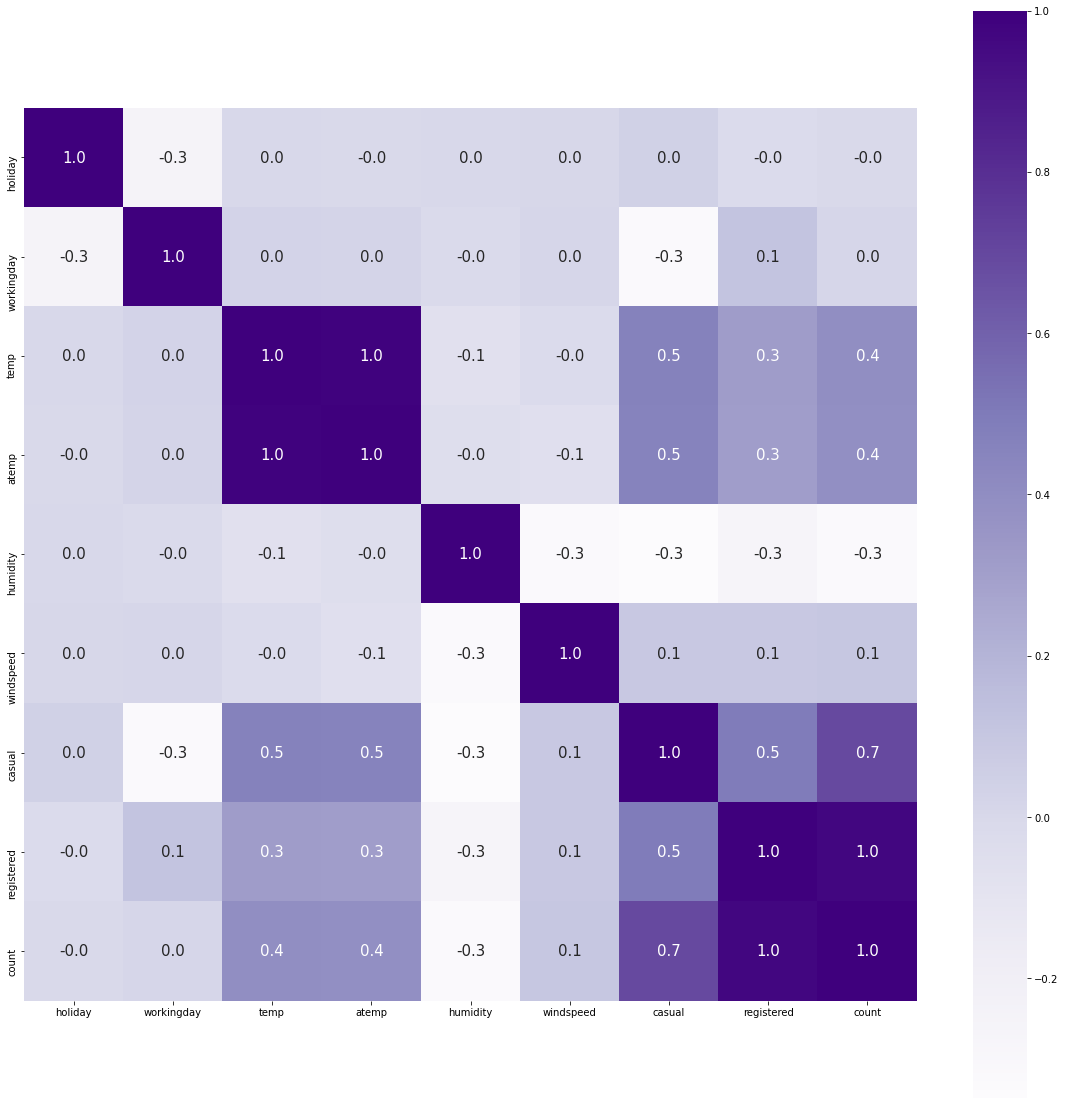

In [120]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Purples')

## Data Preprocessing

In [37]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [39]:
X = df.iloc[:, 1:-3].values
y = df.iloc[:, -1].values

In [40]:
X

array([[ 1.    ,  0.    ,  0.    , ..., 14.395 , 81.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 13.635 , 80.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 13.635 , 80.    ,  0.    ],
       ...,
       [ 4.    ,  0.    ,  1.    , ..., 15.91  , 61.    , 15.0013],
       [ 4.    ,  0.    ,  1.    , ..., 17.425 , 61.    ,  6.0032],
       [ 4.    ,  0.    ,  1.    , ..., 16.665 , 66.    ,  8.9981]])

In [41]:
y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
print(y)

[ 15  39  31 ... 167 128  87]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [45]:
print(X_train)

[[ 3.      0.      1.     ... 31.82   89.     19.9995]
 [ 1.      0.      0.     ... 31.06   53.     16.9979]
 [ 3.      0.      1.     ... 27.275  88.     16.9979]
 ...
 [ 1.      0.      1.     ... 10.605  75.      8.9981]
 [ 4.      0.      0.     ... 15.15   57.     16.9979]
 [ 1.      0.      1.     ...  7.575  55.     12.998 ]]


In [46]:
X_train.shape

(8708, 8)

In [47]:
print(X_test)

[[ 3.      1.      0.     ... 33.335  74.     11.0014]
 [ 1.      0.      0.     ... 21.21   94.     11.0014]
 [ 4.      0.      0.     ... 31.06   44.     12.998 ]
 ...
 [ 1.      0.      1.     ...  9.09   40.     19.0012]
 [ 4.      0.      1.     ... 25.76   64.     12.998 ]
 [ 2.      0.      1.     ... 26.515  88.      8.9981]]


In [48]:
print(y_train)

[ 96  75 257 ...   0 191   2]


In [49]:
print(y_test)

[307  13 536 ...  51 243 212]


In [54]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train[:, 1:-3] = mm.fit_transform(X_train[:, 1:-3])
X_test[:, 1:-3] = mm.transform(X_test[:, 1:-3])

In [55]:
print (X_train)

[[ 3.      0.      1.     ... 31.82   89.     19.9995]
 [ 1.      0.      0.     ... 31.06   53.     16.9979]
 [ 3.      0.      1.     ... 27.275  88.     16.9979]
 ...
 [ 1.      0.      1.     ... 10.605  75.      8.9981]
 [ 4.      0.      0.     ... 15.15   57.     16.9979]
 [ 1.      0.      1.     ...  7.575  55.     12.998 ]]


In [56]:
print (X_test)

[[ 3.      1.      0.     ... 33.335  74.     11.0014]
 [ 1.      0.      0.     ... 21.21   94.     11.0014]
 [ 4.      0.      0.     ... 31.06   44.     12.998 ]
 ...
 [ 1.      0.      1.     ...  9.09   40.     19.0012]
 [ 4.      0.      1.     ... 25.76   64.     12.998 ]
 [ 2.      0.      1.     ... 26.515  88.      8.9981]]


## Train your model (Regression)

SLR_Train

In [57]:
X = df[['temp']]
y = df['count']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [59]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [60]:
slr.intercept_

4.7552675938652555

In [61]:
slr.coef_

array([9.21635584])

In [62]:
from sklearn import metrics

In [63]:
y_pred = slr.predict(X_train)

In [64]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.15798105197237367
MAE: 125.8117646580089
MSE: 27325.740875796466
RMSE: 165.30499349927837


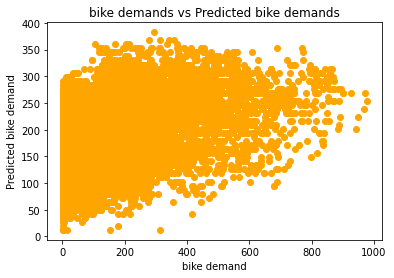

In [65]:
plt.scatter(y_train, y_pred, color='orange')
plt.xlabel("bike demand")
plt.ylabel("Predicted bike demand")
plt.title("bike demands vs Predicted bike demands")
plt.show()

SLR_Test

In [66]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_test, y_test)

LinearRegression()

In [67]:
y_pred = slr.predict(X_test)

<AxesSubplot:xlabel='count', ylabel='Count'>

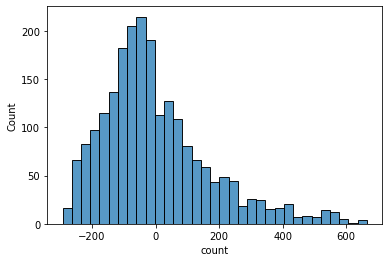

In [68]:
sns.histplot(y_test - y_pred)

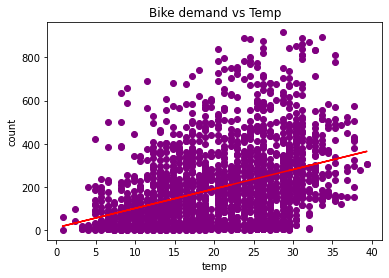

In [69]:
plt.scatter(X_test , y_test , color='purple')
plt.plot(X_test , y_pred , color='red')
plt.title('Bike demand vs Temp')
plt.xlabel('temp')
plt.ylabel('count')
plt.show()

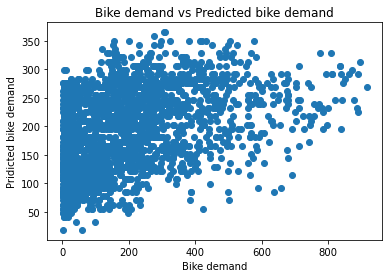

In [70]:
plt.scatter(y_test , y_pred)
plt.title('Bike demand vs Predicted bike demand')
plt.xlabel('Bike demand')
plt.ylabel('Pridicted bike demand')
plt.show()

In [71]:
print('R^2 : ' , metrics.r2_score(y_test , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_test , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

R^2 :  0.14668848111684307
MAE :  130.20984488988276
MSE :  29217.424743377444
RMSE :  170.931052601268


MLR_Train

In [72]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [76]:
mlr.intercept_

-8.526512829121202e-14

In [77]:
mlr.coef_

array([-1.51650763e-14,  1.11621466e-13, -6.80457204e-14,  1.43728941e-14,
        1.01703785e-15, -2.70106635e-15,  1.11075817e-15, -8.91943812e-16,
        1.00000000e+00,  1.00000000e+00])

In [78]:
y_pred = mlr.predict(X_train)

In [79]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
MAE: 8.88196632020083e-14
MSE: 1.470351362028936e-26
RMSE: 1.2125804558992924e-13


MLR_Test

In [80]:
y_pred = mlr.predict(X_test)

<AxesSubplot:ylabel='Count'>

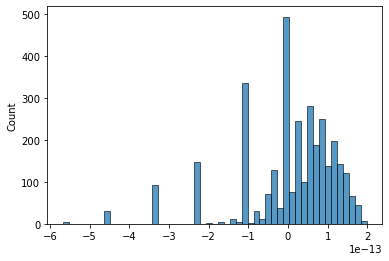

In [81]:
sns.histplot(y_test - y_pred)

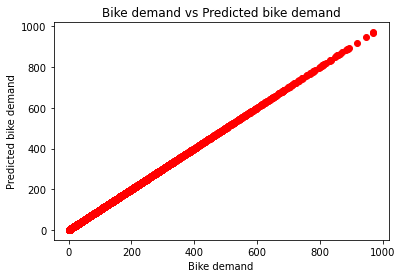

In [83]:
plt.scatter(y_test , y_pred, color='red')
plt.title('Bike demand vs Predicted bike demand')
plt.xlabel('Bike demand')
plt.ylabel('Predicted bike demand')
plt.show()

In [84]:
print('R^2 : ' , metrics.r2_score(y_test , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_test , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

R^2 :  1.0
MAE :  8.896567907760882e-14
MSE :  1.4767163630404276e-26
RMSE :  1.2152021901891172e-13


KNN_Train

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier()

In [87]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred = knn.predict(X_test)

In [89]:
knn.score(X_train, y_train)

0.2431758530183727

In [90]:
knn.score(X_test, y_test)

0.05480710349050827

In [91]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

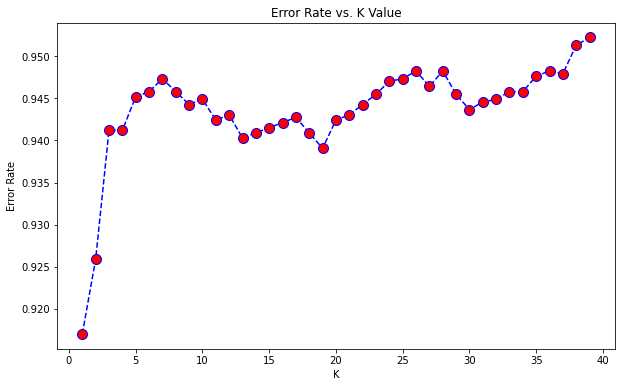

In [92]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)

In [102]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
y_pred = knn.predict(X_test)

In [104]:
knn.score(X_train, y_train)

0.3303149606299213

Decision Tree

In [105]:
X = df.iloc[:,1:-3]
y = df['count']
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,0,1,9.84,14.395,81,0.0000
1,1,0,0,1,9.02,13.635,80,0.0000
2,1,0,0,1,9.02,13.635,80,0.0000
3,1,0,0,1,9.84,14.395,75,0.0000
4,1,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027
10882,4,0,1,1,14.76,17.425,57,15.0013
10883,4,0,1,1,13.94,15.910,61,15.0013
10884,4,0,1,1,13.94,17.425,61,6.0032


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [107]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 10)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=10)

In [108]:
y_pred=regressor.predict([[3,0,1,1,20,18.5,100,8.000]])
y_pred

array([16.])

Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor
rgr = RandomForestRegressor(n_estimators = 100, random_state = 10)
rgr.fit(X,y)

RandomForestRegressor(random_state=10)

In [110]:
y_pred=rgr.predict([[3,0,1,1,20,18.5,100,8.000]])
y_pred

array([60.35364286])

## Storytelling-Visualization

In [111]:
df.replace({ 'season': {1:'Spring' , 2:'Summer' , 3:'Fall' , 4:'Winter'} , 
            'weather' : {1:'Clear' , 2:'Mist' , 3:'Light snow' , 4:'Heavy rain'}} ,inplace=True)

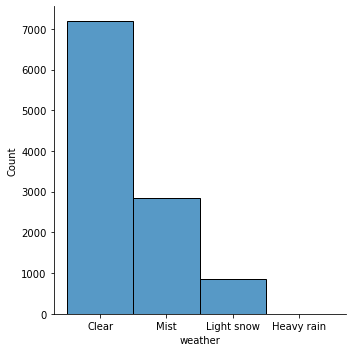

In [112]:
sns.displot(df, x='weather')

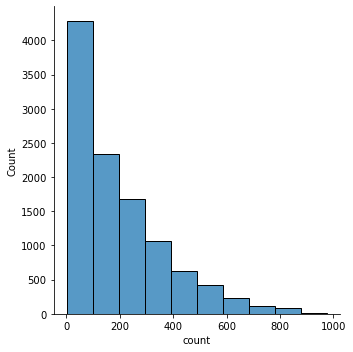

In [113]:
sns.displot(df, x="count",bins=10)

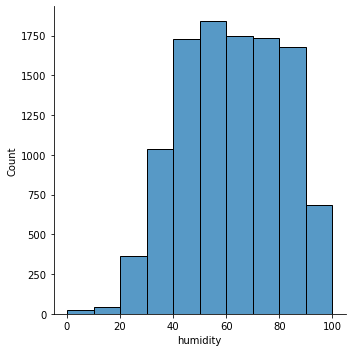

In [121]:
sns.displot(df, x='humidity', bins=10)

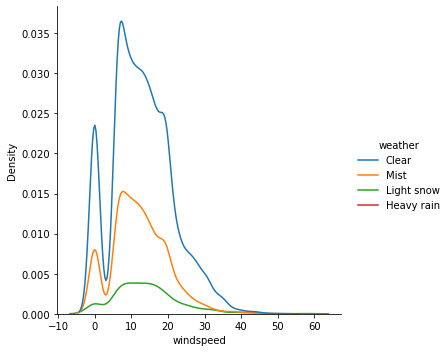

In [122]:
sns.displot(df, x="windspeed", hue='weather',kind="kde")

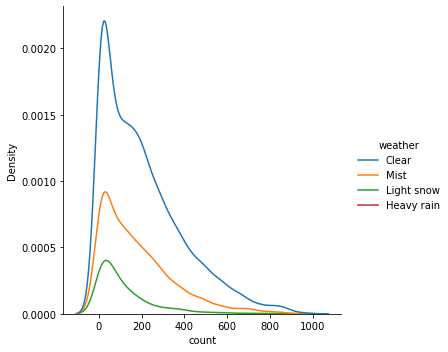

In [123]:
sns.displot(df, x='count', hue='weather',kind="kde")

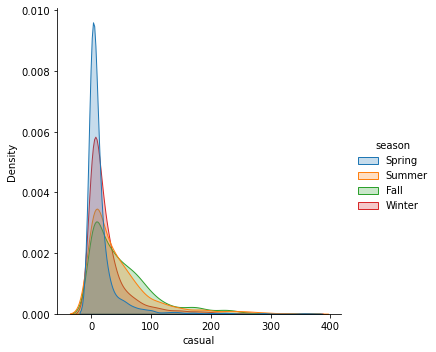

In [124]:
sns.displot(df, x="casual", hue='season',kind="kde", fill= True)

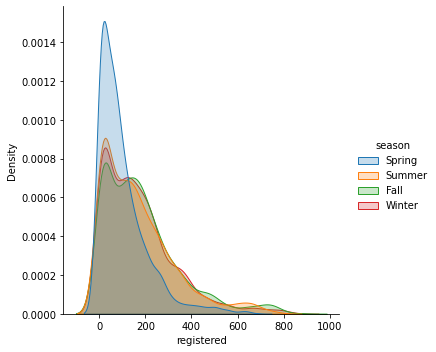

In [125]:
sns.displot(df, x="registered", hue='season',kind="kde", fill= True)

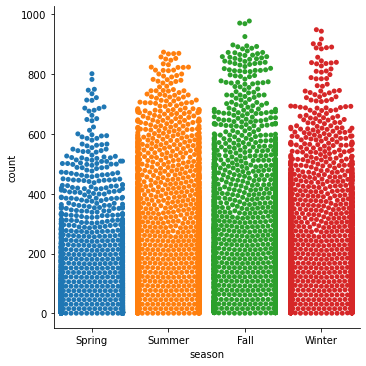

In [126]:
sns.catplot(x="season", y="count", kind= 'swarm', data=df)

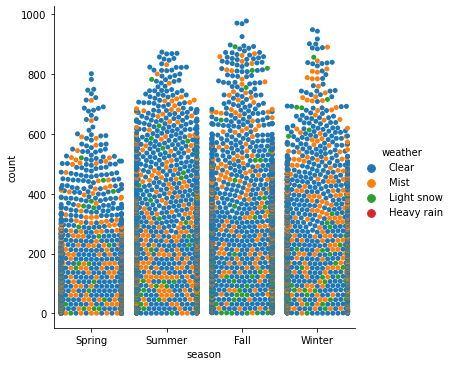

In [127]:
sns.catplot(x="season", y="count", kind= 'swarm', hue= 'weather', data=df)

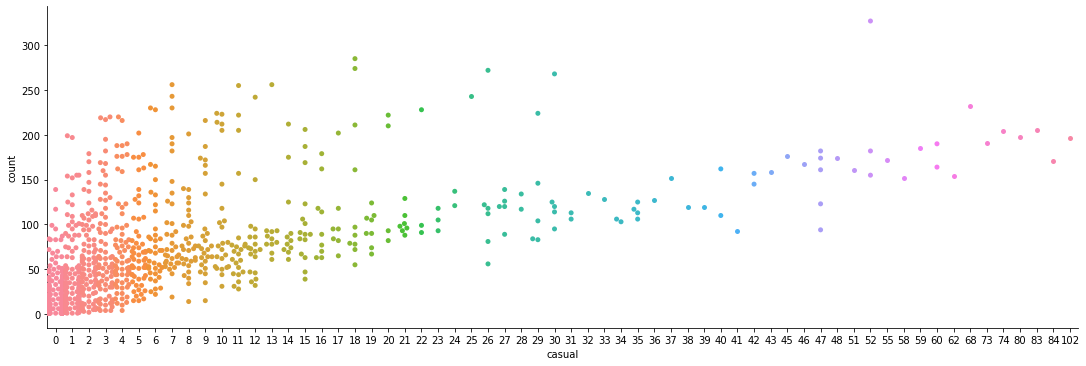

In [128]:
sns.catplot(x=df.casual[0:1000], y='count', kind= 'swarm', data=df, aspect=3)

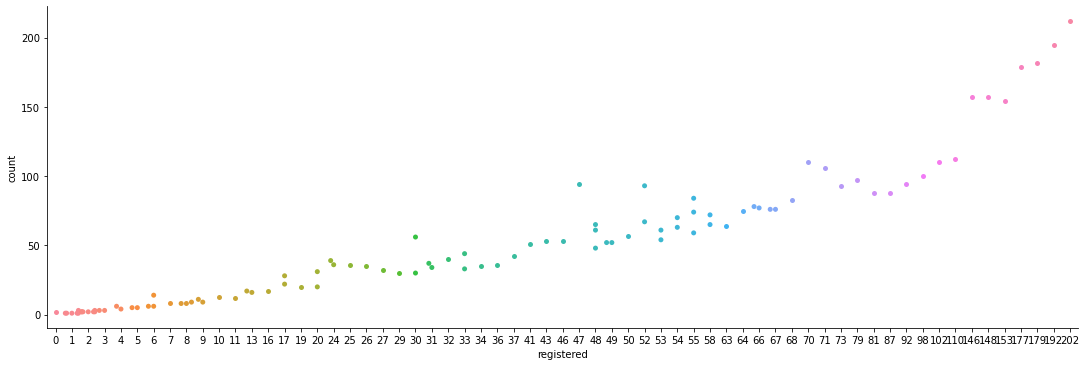

In [129]:
sns.catplot(x=df.registered[0:100], y='count', kind= 'swarm', data=df, aspect=3)

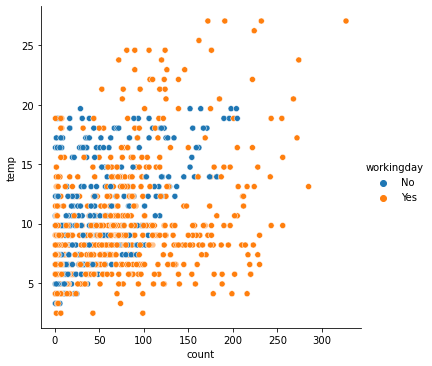

In [130]:
df.replace({ 'holiday': {0:'No' , 1:'Yes'} , 
            'workingday' : {0:'No', 1:'Yes'}} ,inplace=True)

sns.relplot(x="count", y=df.temp[0:1000], hue= 'workingday', data=df)

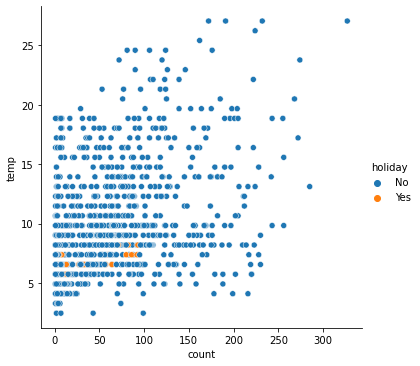

In [131]:
sns.relplot(x="count", y=df.temp[0:1000], hue= 'holiday', data=df)

<AxesSubplot:xlabel='count', ylabel='atemp'>

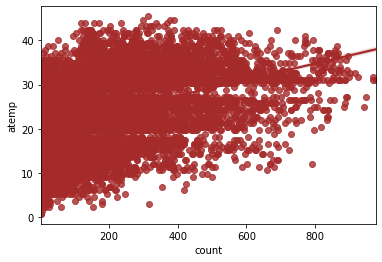

In [135]:
sns.regplot(x='count', y='atemp', data=df, color = 'brown')

## Send us the Result (On Telegram or Soheil.tehranipoor@yahoo.com)